In [1]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
from PIL import Image, ImageOps
from keras.layers import DepthwiseConv2D

print(tf.__version__)

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

2.19.0


In [2]:
import keras

keras.__version__

'3.10.0'

In [3]:
np.set_printoptions(suppress= True)

In [4]:
np.__version__

'2.0.2'

In [5]:
class PatchedDepthwiseConv2D(DepthwiseConv2D):
    def __init__(self, *args, groups=None, **kwargs):
        super().__init__(*args, **kwargs)

In [6]:
with tf.keras.utils.custom_object_scope({'DepthwiseConv2D': PatchedDepthwiseConv2D}):
    model = load_model("F:/Hitayu-PS1/LNG32/LNG32.h5", compile=False)

e:\hitayu\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
labels_names = open("F:/Hitayu-PS1/LNG32/labels.txt","r").readlines()

labels_names

['0 Normal\n', '1 Malingnant\n', '2 Bengin\n']

In [8]:
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [9]:
data

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [10]:
data.shape

(1, 224, 224, 3)

In [11]:
image = Image.open(fp= "F:/LNG32Test/Bengin/Bengin case (9)_11.jpg")

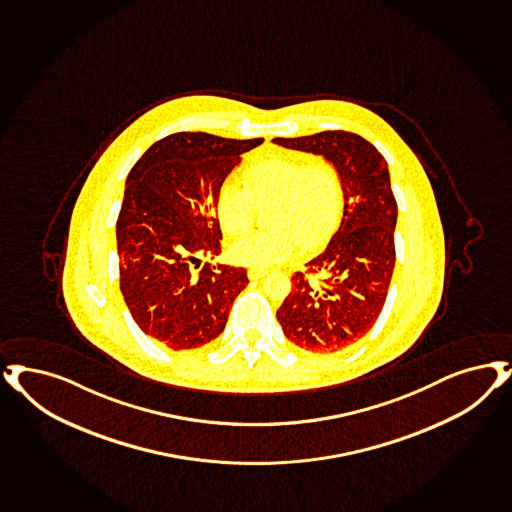

In [12]:
image

In [13]:
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

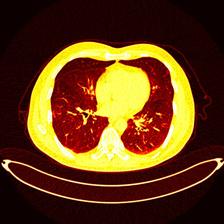

In [14]:
image

In [15]:
image_array = np.asarray(image)

normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

In [16]:
data[0] = normalized_image_array

prediction = model.predict(data)
index = np.argmax(prediction)
class_name = labels_names[index]
confidence_score = prediction[0][index]

print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Class: Bengin
Confidence Score: 0.9989054


In [17]:
with tf.keras.utils.custom_object_scope({"DepthwiseConv2D": PatchedDepthwiseConv2D}):
    skin_model = load_model("F:/Hitayu-PS1/SDN5/SDN5.h5", compile= False)

In [18]:
skin_image = Image.open("F:/Skin_Disease_test_data/Warts/genital-warts-93.jpeg").convert("RGB")

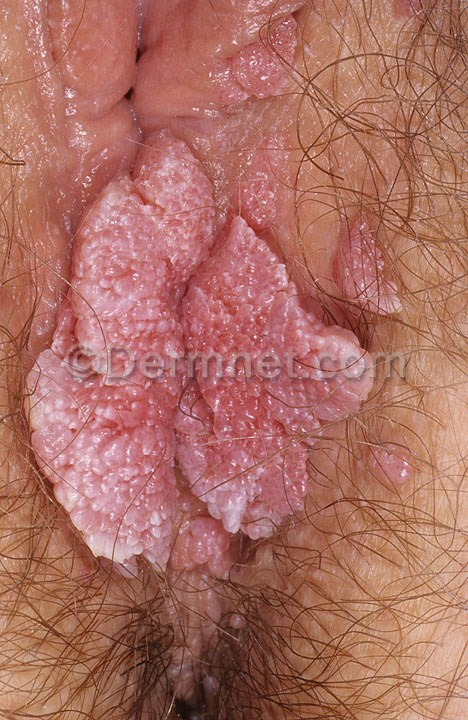

In [19]:
skin_image

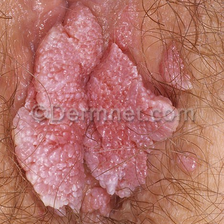

In [20]:
skin_image = ImageOps.fit(image= skin_image, size= size, method= Image.Resampling.LANCZOS)

skin_image

In [21]:
skin_labels = open("F:/Hitayu-PS1/SDN5/sdn_labels.txt").readlines()

skin_labels

['0 Acne\n',
 '1 Eczema\n',
 '2 Psoriasis\n',
 '3 FU-ringworm\n',
 '4 BA- cellulitis\n',
 '5 BA-impetigo\n',
 '6 Warts\n',
 '7 Lupus\n',
 '8 SkinCancer\n',
 '9 chickenpox\n']

In [22]:
skin_image_array = np.asarray(skin_image)

skin_image_array = (image_array.astype(np.float32) / 127.5) - 1

In [23]:
skin_image_array[0][0]

array([-0.90588236, -1.        , -1.        ], dtype=float32)

In [24]:
skin_data = np.ndarray(shape= (1, 224, 224 , 3), dtype= np.float32)

In [25]:
skin_data[0] = skin_image_array

In [26]:
skin_data

array([[[[-0.90588236, -1.        , -1.        ],
         [-0.90588236, -1.        , -1.        ],
         [-0.90588236, -1.        , -1.        ],
         ...,
         [-0.90588236, -1.        , -1.        ],
         [-0.90588236, -1.        , -1.        ],
         [-0.90588236, -1.        , -1.        ]],

        [[-0.90588236, -1.        , -1.        ],
         [-0.90588236, -1.        , -1.        ],
         [-0.90588236, -1.        , -1.        ],
         ...,
         [-0.90588236, -1.        , -1.        ],
         [-0.90588236, -1.        , -1.        ],
         [-0.90588236, -1.        , -1.        ]],

        [[-0.90588236, -1.        , -1.        ],
         [-0.90588236, -1.        , -1.        ],
         [-0.90588236, -1.        , -1.        ],
         ...,
         [-0.90588236, -1.        , -1.        ],
         [-0.90588236, -1.        , -1.        ],
         [-0.90588236, -1.        , -1.        ]],

        ...,

        [[-0.90588236, -1.        , -1

In [27]:
skin_prediction = skin_model.predict(skin_data)

skin_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([[0.        , 0.9903504 , 0.00000517, 0.        , 0.        ,
        0.        , 0.        , 0.00964413, 0.00000026, 0.        ]],
      dtype=float32)

In [28]:
index = np.argmax(prediction)

index

np.int64(2)

In [29]:
skin_cancer_class_names = skin_labels[index]

skin_cancer_class_names

'2 Psoriasis\n'

In [30]:
confidence_score = skin_prediction[0][index]

print("Class:", skin_cancer_class_names[2:], end="")
print("Confidence Score:", confidence_score)

Class: Psoriasis
Confidence Score: 5.165577e-06


In [31]:
from pydantic import BaseModel, Field
from typing import List

In [32]:
class DiseaseInfo(BaseModel):
    disease_name: str = Field(description="The full name of the disease")
    overview: str = Field(description="A 2-3 sentence simple description of the disease")
    symptoms: dict = Field(description="Common and less common symptoms")
    primary_causes: List[str] = Field(description="List of the main causes or risk factors")
    typical_diagnosis_process: List[str] = Field(description="List of steps in the diagnosis process")
    treatment_options: dict = Field(description="Treatment options categorized by type")
    prevention_and_management: List[str] = Field(description="List of actionable tips")
    when_to_seek_medical_help: List[str] = Field(description="List of red-flag symptoms or scenarios")
    questions_for_doctor: List[str] = Field(description="List of suggested questions for a doctor")

In [33]:
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import ChatPromptTemplate
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv()

True

In [34]:
import time

In [37]:
def info_generation(class_name: str) -> dict:
    """
    Info Generation for Particular disease
    
    Args:
        class_name: Class name of the disease
    Returns:
        dict: Structured json response with disease information
    """
    try:
        print("Initialize Output parser")
        parser = JsonOutputParser()

        prompt = ChatPromptTemplate.from_messages([
            ("system", """
        You are a compassionate and clear medical information assistant (Specially in lung cancer domain). Your task is to provide a comprehensive, easy-to-understand overview of a specific disease tailored for a patient or their caregiver.

    **Instructions:**
    1.  **Tone & Language:** Use empathetic, reassuring, and simple language. Avoid complex medical jargon. Explain terms if necessary.
    2.  **Perspective:** Write from the perspective of "What does a patient need to know about living with and understanding this condition?"
    3.  **Content:** Focus on the nature of the disease, how it affects the body and daily life, and how it is managed. **Do not focus on the diagnostic process.**
    4.  **Structure:** Your output must be a perfectly formatted JSON object that follows the exact structure and keys specified below.

    **JSON Output Structure:**
    {{
    "disease_name": "string",
    "overview": "string (A simple 2-3 sentence description of what the disease is)",
    "affected_body_system": "string (e.g., Respiratory System, Nervous System)",
    "symptoms": {{
        "common": ["list", "of", "common", "symptoms"],
        "emergency": ["list", "of", "symptoms", "that", "require", "immediate", "care"] 
    }},
    "causes_and_risk_factors": ["list", "of", "key", "causes", "and", "risk", "factors"],
    "typical_treatments": {{
        "medications": ["list", "of", "common", "medication", "types", "or", "names"],
        "lifestyle_management": ["list", "of", "actionable", "lifestyle", "changes"],
        "supportive_care": ["list", "of", "therapies", "or", "support", "options"]
    }},
    "long_term_outlook": "string (A brief description of the prognosis and what to expect long-term)",
    "self_management_tips": ["list", "of", "practical", "tips", "for", "managing", "the", "condition", "day-to-day"],
    "questions_to_ask_your_doctor": ["list", "of", "relevant", "questions", "for", "a", "patient", "to", "discuss", "with", "their", "doctor"]
    }}

    **Disease to analyze:**
    `Lung cancer level: {disease_name}`"""),

    ("human", "Lung Cancer level: {disease_name}")
        ])

        print("Initializing Google Generative AI model")
        llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

        chain = prompt | llm | parser

        print("Invoking LLM for disease information generation")
        time.sleep(2)
        result_dict = chain.invoke({'disease_name': class_name})

        print(f"Successfully received result from LLM for disease: {class_name}")

        return {
            "resultdict": result_dict,
            "success": True,
            "disease_name": class_name,
            "message": "Disease information generated successfully"
        }
    
    except Exception as e:
        print(e)  # This will log the full exception with traceback
        return {
            "resultdict": None,
            "success": False,
            "disease_name": class_name,
            "error": str(e),
            "message": "Failed to generate disease information"
        }


In [38]:
result = info_generation(class_name= "malignant")

result

Initialize Output parser
Initializing Google Generative AI model
Invoking LLM for disease information generation
Successfully received result from LLM for disease: malignant


{'resultdict': {'disease_name': 'Lung Cancer',
  'overview': 'Lung cancer is a disease where cells in the lung grow out of control and can spread to other parts of the body. It often starts in the lining of the airways and can affect your breathing and overall health. Understanding lung cancer and its management can help you live as comfortably as possible.',
  'affected_body_system': 'Respiratory System',
  'symptoms': {'common': ['Persistent cough or a change in cough',
    'Chest pain',
    'Shortness of breath',
    'Wheezing',
    'Hoarseness',
    'Unexplained weight loss',
    'Bone pain',
    'Headache'],
   'emergency': ['Severe chest pain',
    'Difficulty breathing',
    'Coughing up blood',
    'Seizures',
    'Sudden weakness or numbness in limbs']},
  'causes_and_risk_factors': ['Smoking (including secondhand smoke)',
   'Exposure to radon gas',
   'Exposure to asbestos and other carcinogens',
   'Family history of lung cancer',
   'Previous radiation therapy to the chest